In [2]:
import deepchem as dc
from molgan import BasicMolGANModel as MolGAN
from deepchem.models.optimizers import ExponentialDecay
from tensorflow import one_hot

In [3]:
import pandas as pd

In [4]:
smilesDF = pd.read_csv('Qsmiles.txt', delimiter = '\n', header = None)
smilesDF

0
0        OC12CC(C1)C1CC2O1
1           CCC1CN1CC(N)=O
2           N#CC(CO)NC1CC1
3          O=Cn1cn[nH]c1=O
4             CC(O)c1ncon1
...                    ...
4984       CC1CC(C)C2CC1C2
4985            CCCn1ccnn1
4986      C#CC12CCC1(OC)C2
4987     CC1C(C)C2C1C2(C)O
4988  CC1=CC(O[CH][NH])OC1

[4989 rows x 1 columns]

In [ ]:
smilesList = list(smilesDF[0])

# Classical molGAN implementation

In [8]:
smiles = smilesList
feat = dc.feat.MolGanFeaturizer()
features = feat.featurize(smiles)
features = list(filter(lambda x: x is not None, features))

In [7]:
gan = MolGAN(learning_rate=ExponentialDecay(0.001, 0.9, 5000))
dataset = dc.data.NumpyDataset([x.adjacency_matrix for x in features],[x.node_features for x in features])
def iterbatches(epochs):
    for i in range(epochs):
        for batch in dataset.iterbatches(batch_size=gan.batch_size, pad_batches=True):
            adjacency_tensor = one_hot(batch[0], gan.edges)
            node_tensor = one_hot(batch[1], gan.nodes)
            yield {gan.data_inputs[0]: adjacency_tensor, gan.data_inputs[1]:node_tensor}
gan.fit_gan(iterbatches(8), generator_steps=0.2, checkpoint_interval=5000)
generated_data = gan.predict_gan_generator(10)
# convert graphs to RDKitmolecules
nmols = feat.defeaturize(generated_data)
print("{} molecules generated".format(len(nmols)))
# remove invalid moles
nmols = list(filter(lambda x: x is not None, nmols))
# currently training is unstable so 0 is a common outcome
print ("{} valid molecules".format(len(nmols)))

Ending global_step 399: generator average loss -4.20409, discriminator average loss -3.65412
TIMING: model fitting took 25.408 s
Generating 10 samples
10 molecules generated
7 valid molecules


RDKit ERROR: [12:23:53] Explicit valence for atom # 3 F, 3, is greater than permitted
RDKit ERROR: [12:23:53] Explicit valence for atom # 5 C, 7, is greater than permitted


# Implementing the Quantum Lambda Activation Function

In [12]:
from qiskit import IBMQ
#from qiskit_rng import Generator

In [13]:
from qiskit.circuit import library

In [26]:
from qiskit_rng import Generator

In [27]:
IBMQ.save_account('63be3fbcd17706e675343eaca5c11964a916885ae585d2acdfdfdc476671eebbd3c47db6213f526255be9612a9389413162ca3bdd8862bbd6aa086549b44849f')

In [29]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor


provider = IBMQ.get_provider()

q = QuantumRegister(16,'q')
c = ClassicalRegister(16,'c')
circuit = QuantumCircuit(q,c)
circuit.h(q) # Applies hadamard gate to all qubits
circuit.measure(q,c) # Measures all qubits 

backend = provider.get_backend('ibmq_qasm_simulator')
job = execute(circuit, backend, shots=1100)
                                            
job_monitor(job)
counts = job.result().get_counts()

input()

Job Status: job has successfully run


# Data Preprocessing

In [31]:
import numpy as np

In [33]:
def binaryToDecimal(binary): 
    return int(binary,2)

In [ ]:
randNums = []
for i in range(len(counts)):
    randNums.append(binaryToDecimal(counts.popitem()[0]))

In [36]:
a = np.array(randNums)

array([65460, 65433, 65408, ...,   263,  4195,  4184])

In [37]:
counts1 = np.array(randNums)[0:1000]

array([65460, 65433, 65408, 65357, 65306, 65299, 65237, 65191, 65189,
       64936, 64924, 64877, 64802, 64799, 64767, 64720, 64712, 64673,
       64629, 64607, 64505,  4025, 64398, 64338, 64333, 64259, 64173,
        4003, 64034, 64010, 63783, 63776, 63744, 63737, 63669, 63608,
       63576, 63537, 63463, 63454,  3960, 63336, 63202, 63136, 63057,
       62990, 62925, 62759, 62743, 62638, 62485, 62402, 62297,  3892,
       62233, 62119, 62019, 61900, 61840, 61838, 61715, 61713, 61702,
       61519, 61508, 61472, 61271, 61219, 61143, 61133, 61094, 61028,
       61005, 60981, 60971, 60951, 60870, 60823, 60767, 60742, 60698,
       60671, 60634, 60568, 60480, 60476, 60417, 60396, 60361, 60277,
       60199, 60100, 60074, 60037, 60026, 59984, 59926, 59791, 59779,
       59768, 59745, 59740, 59672, 59655, 59627, 59538, 59510, 59474,
       59452, 59444,  3703, 59245, 59218,  3699, 59172, 59014, 58962,
       58885, 58840, 58762, 58732, 58589, 58538, 58380, 58307, 58117,
       58086, 58062,

# GAN with Quantum Lambda Fucntion

In [40]:
gan = MolGAN(learning_rate=ExponentialDecay(0.001, 0.9, 5000))
dataset = dc.data.NumpyDataset([x.adjacency_matrix for x in features],[x.node_features for x in features])
def iterbatches(epochs):
    for i in range(epochs):
        for batch in dataset.iterbatches(batch_size=gan.batch_size, pad_batches=True):
            adjacency_tensor = one_hot(batch[0], gan.edges)
            node_tensor = one_hot(batch[1], gan.nodes)
            yield {gan.data_inputs[0]: adjacency_tensor, gan.data_inputs[1]:node_tensor}
gan.fit_gan(iterbatches(20), generator_steps=0.2, checkpoint_interval=5000)

inNoise = np.array(randNums)

generated_data = gan.predict_gan_generator(noise_input = np.reshape(counts1,(100,10)))

# convert graphs to RDKitmolecules
nmols = feat.defeaturize(generated_data)
print("{} molecules generated".format(len(nmols)))
# remove invalid moles
nmols = list(filter(lambda x: x is not None, nmols))
# currently training is unstable so 0 is a common outcome
print ("{} valid molecules".format(len(nmols)))

Ending global_step 999: generator average loss -22.3265, discriminator average loss -10.7346
TIMING: model fitting took 51.994 s
Generating 100 samples
100 molecules generated
96 valid molecules


RDKit ERROR: [12:46:30] Explicit valence for atom # 0 C, 7, is greater than permitted
RDKit ERROR: [12:46:30] Explicit valence for atom # 0 C, 5, is greater than permitted
RDKit ERROR: [12:46:30] Explicit valence for atom # 0 C, 7, is greater than permitted
RDKit ERROR: [12:46:30] Explicit valence for atom # 0 C, 6, is greater than permitted


# Visualization

In [19]:
tempMols = nmols
tempMols

In [20]:
from rdkit.Chem import Draw

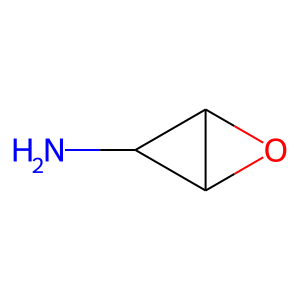

In [24]:
Draw.MolToImage(tempMols[4])

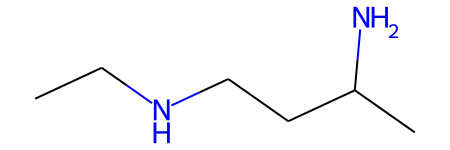

In [170]:
tempMols[1]